# EP.SV3 (Environmental Pollution Domain, Structural Violence Path, Modern Time Frame)


## Main Question Here: Do counties with greater proportion of people racialized as black than the national average face more serious air pollution?

### 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Import Datasets

In [25]:
# This is the main table we are going to use
county_list = pd.read_excel("..\Public Data\VARIABLE for coder X.xlsx")

# This dataset include county-level demographics information in 2020
county_data = pd.read_csv(r"..\Public Data\2020-County-Level-Demographics\DECENNIALDP2020.DP1-Data.csv")

# This dataset include county-level AQI data in 2020
aqi_df = pd.read_csv(r'annual_aqi_by_county_2020\annual_aqi_by_county_2020.csv')

# This dataset include the county-level emission of Hazardous Air Pollutant (HAP) information in 2020
emission_data = pd.read_excel("HAP.xlsx")

KeyboardInterrupt: 

## Get Avg Proportion of People Racialized as Black (As at Least One of Their Ethnicities) Across the Nation in 2020

In [26]:
national_df = pd.read_csv(r"..\Public Data\2020-National-Demographics.csv")
national_black_avg = float(re.findall('(.*)%',national_df.iloc[93,2])[0])
national_black_avg

14.2

## Get County-level Demographics Data: Total Population & Proportion of People Racialized as Black

In [2412]:
county_data = county_data[["GEO_ID","NAME", "DP1_0087P","DP1_0001C"]].iloc[1:,:]
county_data["DP1_0087P"]= county_data["DP1_0087P"].astype("float")
county_data=county_data.rename(columns={"DP1_0087P":"Percentage_of_People_Racialized_as_Black",
                                        "DP1_0001C":"Total_Population"})
# county_greater_proportion = county_data[county_data["DP1_0087P"]>national_black_avg]
# county_greater_proportion
county_data.head(5)

,GEO_ID,NAME,Percentage_of_People_Racialized_as_Black,Total_Population
1,0500000US01001,"Autauga County, Alabama",20.9,58805
2,0500000US01003,"Baldwin County, Alabama",9.0,231767
3,0500000US01005,"Barbour County, Alabama",48.6,25223
4,0500000US01007,"Bibb County, Alabama",20.8,22293
5,0500000US01009,"Blount County, Alabama",2.1,59134


# 

# Join this Table (t1) with the Table Dr. AJ Provided (t0)
### In this step, we need to join 2 tables on t0.statefips + t0.countyfips = t1.geo_id somehow. Notice that t1.GEO_ID = 0500000US + t0.statefips + t0.countyfips.

In [2413]:
def fips_convert(statefips, countyfips):
    fips = "0500000US"
    if statefips<10:
        fips += "0"+str(statefips)
    else:
        fips += str(statefips)
    if countyfips% 10 ==0  and statefips!= 2 and statefips != 15:
        if countyfips<100:
            fips += "00"+str(int(countyfips/10))
        elif countyfips < 1000:
            fips += "0"+str(int(countyfips/10))
        else:
            fips += str(int(countyfips/10))
    elif countyfips%10 != 0 and statefips!=2 and statefips != 15:
        if countyfips<10:
            fips += "00"+str(countyfips)
        elif countyfips<100:
            fips += "0"+str(countyfips)
        else :
            fips += str(countyfips)
    ## Alaska counties
    elif statefips == 2:
        if countyfips < 10:
            fips += "00"+str(countyfips)
        elif countyfips < 100:
            fips += "0"+str(countyfips)
        else:
            fips += str(countyfips)
    ## Hawaii counties
    elif statefips == 15:
        fips += "00"+str(countyfips)[0]
    return str(fips)

In [2414]:
county_list["GEO_ID"]= county_list.apply(lambda x: fips_convert(x["STATEFIPS"],x["COUNTYFIPS"]), axis=1)
# Special Cases
county_list.loc[county_list["ALLCOUNTIES"]=="Carson City","GEO_ID"]="0500000US32510"


In [2415]:
county_list=county_list.merge(county_data, on="GEO_ID",how="left" )
county_list.head(5)

,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,VARIABLE NAME,GEO_ID,NAME,Percentage_of_People_Racialized_as_Black,Total_Population
0,Alabama,G0100010,41.0,1,10,Autauga,NaN,0500000US01001,"Autauga County, Alabama",20.9,58805
1,Alabama,G0100030,41.0,1,30,Baldwin,NaN,0500000US01003,"Baldwin County, Alabama",9.0,231767
2,Alabama,G0100050,41.0,1,50,Barbour,NaN,0500000US01005,"Barbour County, Alabama",48.6,25223
3,Alabama,G0100070,41.0,1,70,Bibb,NaN,0500000US01007,"Bibb County, Alabama",20.8,22293
4,Alabama,G0100090,41.0,1,90,Blount,NaN,0500000US01009,"Blount County, Alabama",2.1,59134


In [2416]:
np.sum(pd.isna(county_list),axis=0)

STATE                                          0
GISJOIN                                        0
STATEICP                                      92
STATEFIPS                                      0
COUNTYFIPS                                     0
ALLCOUNTIES                                    0
VARIABLE NAME                               3258
GEO_ID                                         0
NAME                                          38
Percentage_of_People_Racialized_as_Black      38
Total_Population                              38
dtype: int64

### Notice there are 38 NA's.

## Which Counties Have More Proportion of People Racialized as Black Than National Avg? From Now On I'll Call These Counties "Minority Counties".

In [2417]:
def minority_counties_checker(x):
    if x == "NaN":
        return "Lack Info"
    if x > national_black_avg:
        return "Yes"
    else:
        return "No"
    


county_list["Greater_Minority_Proportion"]= county_list["Percentage_of_People_Racialized_as_Black"].apply(lambda x: minority_counties_checker(x))
county_list["Greater_Minority_Proportion"].value_counts()

No     2531
Yes     727
Name: Greater_Minority_Proportion, dtype: int64

In [2418]:
county_list.head(5)

,STATE,GISJOIN,STATEICP,STATEFIPS,COUNTYFIPS,ALLCOUNTIES,VARIABLE NAME,GEO_ID,NAME,Percentage_of_People_Racialized_as_Black,Total_Population,Greater_Minority_Proportion
0,Alabama,G0100010,41.0,1,10,Autauga,NaN,0500000US01001,"Autauga County, Alabama",20.9,58805,Yes
1,Alabama,G0100030,41.0,1,30,Baldwin,NaN,0500000US01003,"Baldwin County, Alabama",9.0,231767,No
2,Alabama,G0100050,41.0,1,50,Barbour,NaN,0500000US01005,"Barbour County, Alabama",48.6,25223,Yes
3,Alabama,G0100070,41.0,1,70,Bibb,NaN,0500000US01007,"Bibb County, Alabama",20.8,22293,Yes
4,Alabama,G0100090,41.0,1,90,Blount,NaN,0500000US01009,"Blount County, Alabama",2.1,59134,No


## Start Working with County-Level AQI Data.

### Main Question Here: Do Minority Counties Have Worse Air Quality in General?

In [2419]:
aqi_df=aqi_df.rename(columns={"State":"STATE","County":"ALLCOUNTIES"})


In [2420]:
aqi_df.head(5)

,STATE,ALLCOUNTIES,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,269,250,19,0,0,0,0,74,49,36,0,0,198,71,0
1,Alabama,Clay,2020,108,99,9,0,0,0,0,86,49,26,0,0,0,108,0
2,Alabama,DeKalb,2020,364,350,14,0,0,0,0,90,45,36,0,0,331,33,0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0
4,Alabama,Etowah,2020,278,260,18,0,0,0,0,92,46,34,0,0,204,74,0


In [2421]:
#A helper function to convert county names to the form used in main table
def countyname_transform(x:str):
    #Remove heading and trailing spaces
    x=x.strip()
    #Remove dots
    if x.count(".")>0:
        x=x.split(".")[0] + x.split(".")[1]
    return x

### We Need to Transform the County Name.

In [2422]:
aqi_df["ALLCOUNTIES"]=aqi_df["ALLCOUNTIES"].apply(lambda x: countyname_transform(x))
aqi_df["ALLCOUNTIES"]= aqi_df["ALLCOUNTIES"].replace({"Routt":"Routt County",
                                                      "Miami-Dade":"Miami-Dade County",
                                                      "District of Columbia":"District Of Columbia",
                                                      "DuPage":"Dupage",
                                                      "Saint Clair":"St Clair",
                                                      "St John the Baptist":"St John The Baptist",
                                                      "Baltimore (City)":"Baltimore City",
                                                      "Prince George's":"Prince Georges",
                                                      "Saint Louis":"St Louis",
                                                      "Saint Charles":"St Charles",
                                                      "Sainte Genevieve":"Ste Genevieve",
                                                      "Lewis and Clark":"Lewis And Clark",
                                                      "Adjuntas":"Adjuntas Municipio",
                                                      "Bayamon":"BayamÛn Municipio",
                                                      "Caguas":"Caguas Municipio",
                                                      "Catano":"CataÒo Municipio",
                                                      "Fajardo":"Fajardo Municipio",
                                                      "Guayama":"Guayama Municipio",
                                                      "Guaynabo":"Guaynabo Municipio",
                                                      "Juncos":"Juncos Municipio",
                                                      "Mayagnez":"Mayag¸ez Municipio",
                                                      "Ponce":"Ponce Municipio",
                                                      })
aqi_df.loc[(aqi_df["ALLCOUNTIES"]=="San Juan") & (aqi_df["STATE"]=="Puerto Rico"),"ALLCOUNTIES"] = "San Juan Municipio"
aqi_df.loc[(aqi_df["ALLCOUNTIES"]=="Charles") & (aqi_df["STATE"]=="Virginia"),"ALLCOUNTIES"] = "Charles City"

In [2423]:
minority_county_aqi=county_list.merge(aqi_df,on=["STATE","ALLCOUNTIES"],how = "inner")

In [2424]:
minority_counties = minority_county_aqi[minority_county_aqi["Greater_Minority_Proportion"]=="Yes"]
non_minority_counties = minority_county_aqi[minority_county_aqi["Greater_Minority_Proportion"]=="No"]

Text(0, 0.5, 'Count')

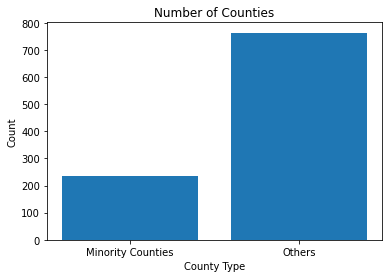

In [2425]:
plt.bar(x=["Minority Counties","Others"],height=[minority_counties.shape[0],non_minority_counties.shape[0]])
plt.title("Number of Counties")
plt.xlabel("County Type")
plt.ylabel("Count")

In [2426]:
np.mean(minority_counties["Median AQI"])

35.170212765957444

In [2427]:
np.mean(non_minority_counties["Median AQI"])

33.876802096985585

In [2428]:
np.var(minority_counties["Median AQI"])

52.94975101856042

In [2429]:
np.var(non_minority_counties["Median AQI"])

122.86031375768891

In [2440]:
from scipy import stats
stats.ttest_ind(minority_counties["Median AQI"],non_minority_counties["Median AQI"]).pvalue

0.09345551913562322

## The Test Result is Not Significant. Let's Look at Emission Data.

In [2431]:
emission_data["STATE"].unique()


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Tribal', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [2432]:
def FIPS_to_GEO_ID(x):
    x= str(x)
    s = "0500000US"
    if len(x)==4:
        s += "0"+x
    else:
        s += x 
    return s
total_emission = emission_data.groupby(["STATE","State-County","FIPS"]).agg({"Emissions (Tons)":"sum"})
total_emission=total_emission.reset_index(drop=False)
total_emission["GEO_ID"] = total_emission["FIPS"].apply(lambda x: FIPS_to_GEO_ID(x))
total_emission

,STATE,State-County,FIPS,Emissions (Tons),GEO_ID
0,Alabama,AL - Autauga,1001,1252.264152,0500000US01001
1,Alabama,AL - Baldwin,1003,70.381869,0500000US01003
2,Alabama,AL - Barbour,1005,32.438054,0500000US01005
3,Alabama,AL - Bibb,1007,14.265290,0500000US01007
4,Alabama,AL - Blount,1009,0.087035,0500000US01009
...,...,...,...,...,...
3004,Wyoming,WY - Sweetwater,56037,2550.890355,0500000US56037
3005,Wyoming,WY - Teton,56039,1.914397,0500000US56039
3006,Wyoming,WY - Uinta,56041,176.839538,0500000US56041
3007,Wyoming,WY - Washakie,56043,19.244940,0500000US56043


In [2433]:
combined_HAP_df = county_list.merge(total_emission,on=["GEO_ID"],how="inner")
np.sum(combined_HAP_df.isna(),axis=0)

STATE_x                                        0
GISJOIN                                        0
STATEICP                                      46
STATEFIPS                                      0
COUNTYFIPS                                     0
ALLCOUNTIES                                    0
VARIABLE NAME                               3001
GEO_ID                                         0
NAME                                           0
Percentage_of_People_Racialized_as_Black       0
Total_Population                               0
Greater_Minority_Proportion                    0
STATE_y                                        0
State-County                                   0
FIPS                                           0
Emissions (Tons)                               0
dtype: int64

In [2434]:
non_minority_HAP_df = combined_HAP_df[combined_HAP_df["Greater_Minority_Proportion"]=="No"]
minority_HAP_df = combined_HAP_df[combined_HAP_df["Greater_Minority_Proportion"]=="Yes"]

In [2435]:
np.mean(non_minority_HAP_df["Emissions (Tons)"]) 

54.424843771433395

In [2436]:
np.mean(minority_HAP_df["Emissions (Tons)"])

132.71982129885612

In [2437]:
stats.ttest_ind(non_minority_HAP_df["Emissions (Tons)"],minority_HAP_df["Emissions (Tons)"])

Ttest_indResult(statistic=-9.230676973453667, pvalue=4.9390580213244694e-20)

### Here p-value <<0.05, so we are very confident to say that the counties with more proportion of people racialized as black face more emission of hazardous air pollutant (HAP) than other types of counties.

### Data Visualization

Text(0.5, 1.0, 'Mean Hazardous Air Pollutant(HAP) Emission of Two Types of Counties in 2020')

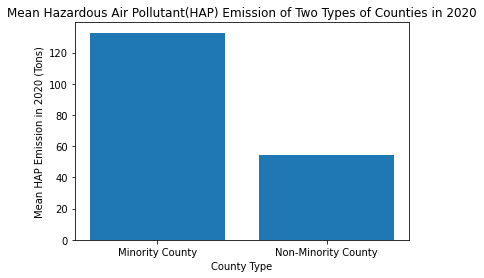

In [2438]:
plt.bar(x=["Minority County","Non-Minority County"],height=[np.mean(minority_HAP_df["Emissions (Tons)"]),np.mean(non_minority_HAP_df["Emissions (Tons)"])  ])
plt.xlabel("County Type")
plt.ylabel("Mean HAP Emission in 2020 (Tons)")
plt.title("Mean Hazardous Air Pollutant(HAP) Emission of Two Types of Counties in 2020")

Text(0, 0.5, 'Emissions (Tons) of HAP in 2020')

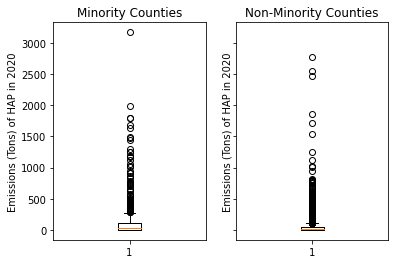

In [2439]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2,sharey=True)
ax[1].boxplot(non_minority_HAP_df["Emissions (Tons)"])
ax[0].boxplot(minority_HAP_df["Emissions (Tons)"])

ax[0].set_title("Minority Counties")
ax[1].set_title("Non-Minority Counties")

ax[1].set_ylabel("Emissions (Tons) of HAP in 2020")
ax[0].set_ylabel("Emissions (Tons) of HAP in 2020")